In [1]:
import proplot
import xarray as xr

import plotting

In [2]:
LEGEND_FONTSIZE = plotting.FONTSIZE - 2
plotting.configure_style(legend_fontsize=LEGEND_FONTSIZE)

In [3]:
def open_data(variables, validation_year):
    bias = xr.open_dataset("annual_mean_bias.nc")[variables].sel(validation_year=validation_year)
    metrics = xr.open_dataset("annual_mean_metrics.nc")[variables].sel(validation_year=validation_year)
    stack_dims = ("configuration", "time")
    return bias.stack(sample=stack_dims), metrics.stack(sample=stack_dims)

In [4]:
VARIABLES = ["total_precipitation_rate", "surface_temperature"]
VALIDATION_YEAR = "Year two"
PALETTE = [
    "#E69F00",
    "#56B4E9",
    "#CC79A7",
    "#009E73",
    "#0072B2"
]
ML_CORRECTED_CONFIGURATIONS = [
    "ML-corrected seed 0",
    "ML-corrected seed 1",
    "ML-corrected seed 2",
    "ML-corrected seed 3"
]
CONFIGURATIONS = ["Baseline"] + ML_CORRECTED_CONFIGURATIONS

bias, metrics = open_data(VARIABLES, VALIDATION_YEAR)

In [5]:
ML_CORRECTED_SAMPLES = bias.configuration.isin(ML_CORRECTED_CONFIGURATIONS) & (bias.time.dt.year == 2018)
BASELINE_SAMPLES = bias.configuration == "Baseline"
SAMPLES = BASELINE_SAMPLES | ML_CORRECTED_SAMPLES

In [6]:
precip_land_bias = plotting.to_plottable_dataframe(metrics, "total_precipitation_rate", "land", "mean", SAMPLES)
tsfc_land_bias = plotting.to_plottable_dataframe(metrics, "surface_temperature", "land", "mean", SAMPLES)

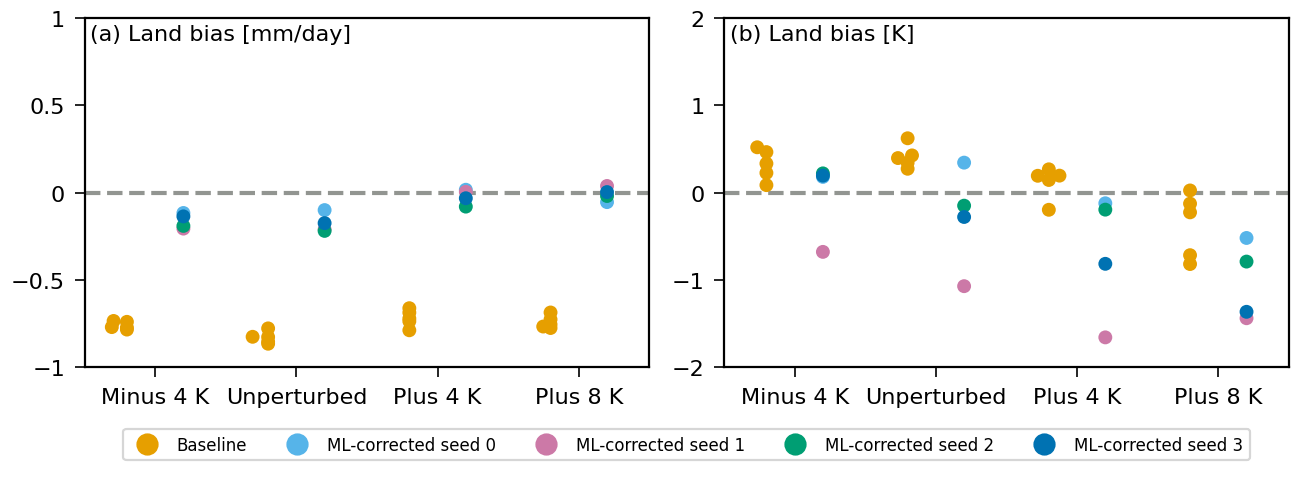

In [7]:
fig, (ax1, ax2) = proplot.subplots(ncols=2, nrows=1, refaspect=1/0.618, figwidth=6.5, sharey="labels")

plotting.swarmplot_by_category(
    ax1,
    precip_land_bias,
    "total_precipitation_rate",
    PALETTE,
    add_legend=False,
    dodge=True,
    x="climate"
)
ax1.set_ylim(-1, 1)
ax1.set_ylabel("")
ax1.axhline(0.0, color="gray", ls="--")

plotting.swarmplot_by_category(
    ax2,
    tsfc_land_bias,
    "surface_temperature",
    PALETTE,
    add_legend=False,
    dodge=True,
    x="climate"
)
ax2.set_ylim(-2, 2)
ax2.set_ylabel("")
ax2.axhline(0.0, color="gray", ls="--")

for ax in [ax1, ax2]:
    ax.set_xlabel("")
    
ax1.annotate("(a) Land bias [mm/day]", xy=(0, 1), xytext=(2, -2), va='top', xycoords='axes fraction', textcoords='offset points')
ax2.annotate("(b) Land bias [K]", xy=(0, 1), xytext=(2, -2), va='top', xycoords='axes fraction', textcoords='offset points')

plotting.legend(fig, CONFIGURATIONS, PALETTE, loc="bottom", ncols=5, fontsize=6)
fig.savefig("figures/figure-08.png", dpi=200)
fig.savefig("figures/figure-08.pdf")